# Artificial neural network with keras-MNIST data

First, the mnist dataset has been imported along with tensorflow library. Then the data has been divided into train and test set. And then normalizing the data with "tf.keras.utils.normalize".

In [1]:
import tensorflow as tf #inporting tensorflow library

mnist = tf.keras.datasets.mnist # importing mnist dataset-28*28 images with handwritten digits

(X_train, y_train),(X_test, y_test) = mnist.load_data() #dividing data into train and test set

X_train = tf.keras.utils.normalize(X_train, axis = 1) #normalizing train data
X_test = tf.keras.utils.normalize(X_test, axis = 1)   #normalizing test data

Then, the keras sequential model has been created. In that model first of all, flatten layer has been applied, because the dense layer only accepts 1D data. Then, two dense layers containing 128 neurons each and activation layer of "relu". Then, "adam" is used as an optimizer and as the categories are more than two, 'sparse_categorical_crossentropy' will be good for reducing the loss in the "model.compile". At last, 'accuracy' is used in matrcs. And then, training of the model has been done woth 3 epochs.

In [2]:
model = tf.keras.models.Sequential()  #creating keras sequential model
model.add(tf.keras.layers.Flatten())  #adding flatten layer before dense layer
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))  #adding dense layer with 128 neurons and "relu" as an activation function
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))  #adding dense layer with 128 neurons and "relu" as an activation function
model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax)) #adding output layer with 10 neurons as the required outputs are 10, and with "softmax" activation function

model.compile(optimizer = 'adam',  #adding 'adam' optimizer 
             loss = 'sparse_categorical_crossentropy',  #adding 'sparse_categorical_crossentropy' as loss function
             matrics = ['accuracy'])  #selecting 'accuracy' in matrics

model.fit(X_train,y_train, epochs = 3) #training the model with train set and 3 epochs

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2584
Epoch 2/3
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1047
Epoch 3/3
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0697


Below, the validation loss and validation accuracy has been printed with the help of "model.evaluate" function.

In [3]:
val_loss, val_acc = model.evaluate(X_test, y_test) 
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

TypeError: cannot unpack non-iterable numpy.float64 object

Below code is just to analyse the images by plotting them with matplotlib.pyplot

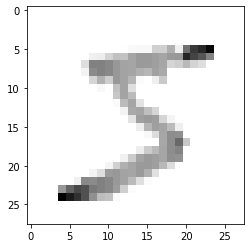

In [2]:
import matplotlib.pyplot as plt  #importing matplotlib.pyplot
plt.imshow(X_train[0], cmap = plt.cm.binary)  #plotting the zeroeth image
plt.show()

Then, saving the trained model with "model.save" to the system.

In [4]:
model.save('epic_MNIST_reader') #saving the keras model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_MNIST_reader/assets


Below code is to load the trained model to make predictions 

In [5]:
new_model = tf.keras.models.load_model('epic_MNIST_reader') #loading the trained model

In [6]:
predictions = new_model.predict([X_test]) #predicting with loaded model

In [7]:
import numpy as np        
print(np.argmax(predictions[0]))

7


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])
plt.show()